In [1]:
from google.colab import drive
drive.mount('/content/drive')


# get the images https://drive.google.com/open?id=1KALHmkW8Jt0cpqz6elvtbulEG_I_GZDJ
# get the csv 0,1 (up down) here : https://drive.google.com/open?id=1HGXKO6r6NY5nf7G9mja69NIR7NZSL9Ed

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**I know this needs to be tweaked, just the raw data eh! and a very little training and tweaking**

In [2]:
cd /

/


In [3]:
cd /content/drive/My\ Drive/'Colab Notebooks'/PONG/AI

/content/drive/My Drive/Colab Notebooks/PONG/AI


In [4]:
import keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
import cv2
import time

Using TensorFlow backend.


In [5]:
!unzip images.zip

Archive:  images.zip
   creating: images/
  inflating: images/frame_508.jpg    
  inflating: images/frame_1120.jpg   
  inflating: images/frame_1963.jpg   
  inflating: images/frame_1082.jpg   
  inflating: images/frame_1337.jpg   
  inflating: images/frame_605.jpg    
  inflating: images/frame_1257.jpg   
  inflating: images/frame_1428.jpg   
  inflating: images/frame_1736.jpg   
  inflating: images/frame_1264.jpg   
  inflating: images/frame_817.jpg    
  inflating: images/frame_373.jpg    
  inflating: images/frame_1557.jpg   
  inflating: images/frame_438.jpg    
  inflating: images/frame_1619.jpg   
  inflating: images/frame_1611.jpg   
  inflating: images/frame_1289.jpg   
  inflating: images/frame_1874.jpg   
  inflating: images/frame_1947.jpg   
  inflating: images/frame_1329.jpg   
  inflating: images/frame_1738.jpg   
  inflating: images/frame_1581.jpg   
  inflating: images/frame_1243.jpg   
  inflating: images/frame_960.jpg    
  inflating: images/frame_889.jpg    
  inflat

In [6]:
ls

actions.csv  images/  images.zip  Untitled0.ipynb


In [7]:
from tqdm import tqdm

X = []
Y = []

with open ('actions.csv', 'r') as f:
    for line in f:
        Y.append(line.rstrip())


all_images = []
img_num = 0

#while tqdm(img_num < 30000): #3000 denotes the total no of input images
print("LOADING IMAGES! please wait...")


for img_num in tqdm(range(2000)):
  img = cv2.imread('images/frame_{0}.jpg'.format(img_num), cv2.IMREAD_GRAYSCALE)
  img = img[:, :, np.newaxis]
  all_images.append(img)
  img_num += 1
        

X = np.array(all_images)


  1%|▏         | 25/2000 [00:00<00:07, 249.48it/s]

LOADING IMAGES! please wait...


100%|██████████| 2000/2000 [00:06<00:00, 304.53it/s]


In [9]:
MODEL_FIRST = 'Pong'
MODEL_END = time.asctime( time.localtime(time.time()))
MODEL_NAME = '{}_{}.h5'.format(MODEL_FIRST,MODEL_END)
#MODEL_NAME

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.02, random_state=5)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 3
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('sigmoid'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

history = model.fit(x_train, y_train,
              batch_size=32,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)
#save weights post training

model.save(MODEL_NAME)


Train on 1960 samples, validate on 40 samples
Epoch 1/10
1960/1960 [==============================] - 44s 22ms/step - loss: 0.7357 - acc: 0.5520 - val_loss: 0.6062 - val_acc: 0.8000
Epoch 2/10
1960/1960 [==============================] - 43s 22ms/step - loss: 0.5857 - acc: 0.6668 - val_loss: 0.4532 - val_acc: 0.8250
Epoch 3/10
1960/1960 [==============================] - 43s 22ms/step - loss: 0.5030 - acc: 0.7643 - val_loss: 0.3459 - val_acc: 0.8500
Epoch 4/10
1960/1960 [==============================] - 43s 22ms/step - loss: 0.4531 - acc: 0.8020 - val_loss: 0.3467 - val_acc: 0.8500
Epoch 5/10
1960/1960 [==============================] - 43s 22ms/step - loss: 0.4295 - acc: 0.8143 - val_loss: 0.3723 - val_acc: 0.8500
Epoch 6/10
1960/1960 [==============================] - 43s 22ms/step - loss: 0.4166 - acc: 0.8158 - val_loss: 0.3438 - val_acc: 0.8500
Epoch 7/10
1960/1960 [==============================] - 42s 22ms/step - loss: 0.3969 - acc: 0.8296 - val_loss: 0.3242 - val_acc: 0.8500
Ep

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


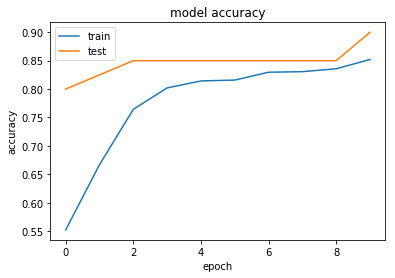

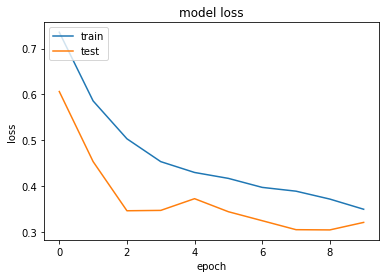

In [10]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resnet , vgg-16